In [1]:
import numpy as np
from scipy import stats, special
import matplotlib.pyplot as plt
import arviz as az

from ipywidgets import interact
import ipywidgets as ipyw

In [2]:
az.style.use('arviz-darkgrid')

In [3]:
%%HTML
<style>

.CodeMirror {
    width: 100vw;
}

.container {
    width: 99% !important;
}

.rendered_html {
  font-size:0.8em;
}
.rendered_html table, .rendered_html th, .rendered_html tr, .rendered_html td {
     font-size: 100%;
}


body {
  font-family: Ubuntu;
  background: #F0F0F0;
  background-color: #F0F0F0;
}


.reveal h1,
.reveal h2,
.reveal h3,
.reveal h4,
.reveal h5,
.reveal h6 {
  margin: 0 0 20px 0;
  color: #2a2eec;
  font-family: Ubuntu;
  line-height: 0.9em;
  letter-spacing: 0.02em;
  text-transform: none;
  text-shadow: none;
}

.reveal blockquote {
  display: block;
  position: relative;
  background: #fa7c17;
  border-radius: 15px;
  box-shadow: 0px 0px 2px rgba(0, 0, 0, 0.2);
  font-weight: bold;
}

</style>

In [4]:
from traitlets.config.manager import BaseJSONConfigManager
path = "/home/osvaldo/anaconda3/etc/jupyter/nbconfig"
cm = BaseJSONConfigManager(config_dir=path)
cm.update("livereveal", {
              "theme": "serif",
              "transition": "zoom",
              "start_slideshow_at": "selected",
              "controls": "False",
              "progress": "False",
              "shortcut": "False",});


<center><img src="img/logo_inst.png" width="750">
<br>
<br>
<br>
<br>
<h1 align="center">Teorema de Bayes e inferencia estadística</h1>



<br>
<br>
<br>
<br>
<br>

## Objetivos


* Comprender el teorema de Bayes
* Comprender que implica hacer estadística Bayesiana
* Aprender cómo se interpretan las probabilidades en estadística Bayesiana
* Entender las distribuciones a priori, a posteriori y a posteriori predictiva 


## Modelado Bayesiano

<br>

* La estadística es una forma de modelado 

* Los modelos estadísticos generan datos

* Un modelo Bayesiano tiene dos requisitos:
    1. Las cantidades desconocidas (parámetros) son modeladas usando **distribuciones de probabilidad**
    2. Las cantidades conocidas (datos) son combinadas con la **distribución a priori de parámetros** usando el **Teorema de Bayes**

## Estadística Bayesiana

<br>

* Las distribuciones de probabiliad _distribuyen_ probabilidades (credibilidades) entre un cierto conjunto de eventos


* La estadística Bayesiana es la re-distribución de probabilidades (credibilidades)

## Teorema de Bayes

<br>

$$\underbrace{p(\theta \mid y)}_{a \ posteriori} = \frac{\overbrace{p(y \mid \theta)}^{\text{likelihood}}\; \overbrace{p(\theta)}^{a \ priori}}{\underbrace{\color{red}{p(y)}}_{\text{likelihood marginal}}}$$
<br>

* $\theta$ representa los parámetros en nuestros modelos (lo que queremos averiguar o aprender)
* $y$ representa los datos


* El objeto central de la estadística Bayesiana es la distribución _a posteriori_.


* $\color{red}{p(y) = \int_{\Theta} p(y \mid \theta)p(\theta) d(\theta)}$ Generalmente no tiene solución analítica o es muy costosa
--> Métodos numéricos al rescate!

## Estadística Bayesiana en 3 pasos (flujo Bayesiano simplificado)

<br>
 

1. **Crear un modelo probabilista**. Especificar un modelo de probabilidad que incluya algún tipo de conocimiento previo sobre los parámetros del modelo


2. **Condicionar el modelo a los datos observados**. Usando el teorema de Bayes la distribución a priori es actualizada de acuerdo a los datos observados,  obteniendose la distribución _a posteriori_.


3. <font color = "gray"> **Evaluar el ajuste del modelo a los datos y la sensibilidad de las conclusiones a cambios en los supuestos del modelo.**. </font>

## Estadística de monedas mágicas

<br>

* Queremos modelar el resultado de arrojar una moneda al aire.
    * Cuál es la probabilidad de desarrolar cancer gástrico cuando se consumen dosis bajas de aspirina?
    * Cuál es la probabiliad que una persona esté a favor del aborto?

* Nuestro parámetro, $\theta$, puede tomar valores en el intervalo [0, 1]
    * $\theta = 1 \implies$ siempre cara
    * $\theta = 0 \implies$ siempre ceca

* De acuerdo al teorema de Bayes es necesario definir un *likelihood* y un *prior*:


$$p(\theta \mid y) \propto \underbrace{p(y \mid \theta)}_{\text{?}} \; \underbrace{p(\theta)}_{?}$$

## El modelo beta-binomial

<br>
<br>
Representación matemática:
$$
\theta \sim \operatorname{Beta}(\alpha, \beta) \\
y \sim \operatorname{Bin}(n=1, p=\theta)
$$


<br>

Representación visual (gráfo dirigido y acíclico):
<img src="img/modelo_1_moneda.png" width=300>

De arriba hacia abajo, tenemos la distribución *a priori*, luego el likelihood, y finalmente los datos. Las flechas indican la relación entre las partes del modelo, el símbolo $\sim$ la naturaleza estocástica de las variables.

In [5]:
def beta(α, β):
    x = np.linspace(0, 1, 130)
    beta = stats.beta(α, β)
    plt.plot(x, beta.pdf(x))
    plt.yticks([])
    plt.ylim(0, 6)

interact(beta,
         α=ipyw.FloatSlider(min=0.5, max=7, step=0.5, value=2),
         β=ipyw.FloatSlider(min=0.5, max=7, step=0.5, value=2));

interactive(children=(FloatSlider(value=2.0, description='α', max=7.0, min=0.5, step=0.5), FloatSlider(value=2…

In [6]:
def binomial(n, θ):
    bino = stats.binom(
        n, θ)
    plt.bar(range(n+1), bino.pmf(range(n+1)))
    plt.xticks(range(n+1))
    plt.ylim(0, 1);

interact(binomial, n=ipyw.IntSlider(min=1, max=10, value=1), θ=ipyw.FloatSlider(min=0, max=1, step=0.05, value=0.5));

interactive(children=(IntSlider(value=1, description='n', max=10, min=1), FloatSlider(value=0.5, description='…

### La distribución *a posteriori*

Como ya vimos el prior congujado de la distribución binomial es la distribución beta y estos nos conduce a una distribución *a posteriori*  con los siguientes parámetros

<br>

$$
p(\theta \mid y) \propto \operatorname{Beta}(\alpha=\alpha_{prior} + y , \quad \beta= \beta_{prior} + N - y)
$$

<br>

Cuando se cumple que para una cierta probabilidad la forma funcional de un prior y la de un posterior es la misma, se dice que la distribución a prior está conjugada con la distribución a posteriori.

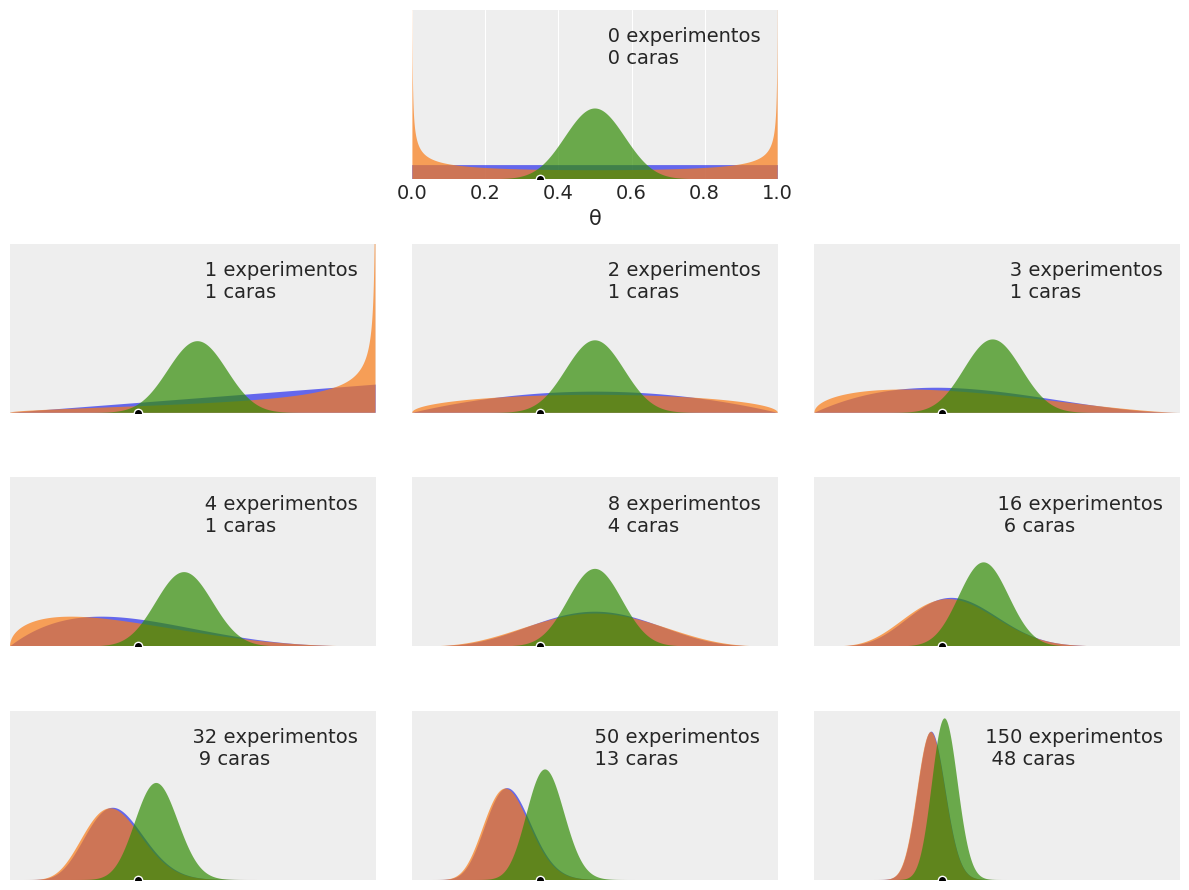

In [9]:
plt.figure(figsize=(12, 9))

n_trials = [0, 1, 2, 3, 4, 8, 16, 32, 50, 150]
data = [0, 1, 1, 1, 1, 4, 6, 9, 13, 48]
θ_real = 0.35

beta_params = [(1, 1), (0.5, 0.5), (20, 20)]
dist = stats.beta
x = np.linspace(0, 1, 2000)

for idx, N in enumerate(n_trials):
    if idx == 0:
        plt.subplot(4, 3, 2)
        plt.xlabel('θ')
    else:
        plt.subplot(4, 3, idx+3)
        plt.xticks([])
    y = data[idx]
    for (α, β) in beta_params:
        p_θ_dado_y = dist.pdf(x, α + y, β + N - y)
        plt.fill_between(x, 0, p_θ_dado_y, alpha=0.7)

    plt.plot(θ_real, 0, marker='o', mec='w', mfc='k')
    plt.plot(0, 0, label=f'{N:4d} experimentos\n{y:4d} caras', alpha=0)
    plt.xlim(0, 1)
    plt.ylim(0, 12)
    plt.legend()
    plt.yticks([])
plt.tight_layout()

## Distribución predictiva a posteriori

**Conceptualmente**: es la distribución de datos predicha ($\tilde{y}$) de acuerdo a la distribución *a posteriori* (y los ya datos observados)


**Matemáticamente**

$$p(\tilde{y} \,|\, y) = \int p(\tilde{y} \,|\, \theta) \, p(\theta \,|\, y) \, d\theta$$


**Computacionalmente** (correr el modelo hacia adelante)

1. Elegir a partir de la distribución _a posteriori_ un valor de $\theta$
2. Introduzca ese valor la distribución usada como likelihood
3. Repita 1 y 2 tantas veces como sea necesario.

## Distribución predictiva a priori

**Conceptualmente**: es la distribución de datos predicha por el modelo antes de haber visto los datos


**Matemáticamente**

$$
p(y^\ast) =  \int_\Theta p(y \mid \theta) p(\theta) d\theta
$$


**Computacionalmente** (correr el modelo hacia adelante)

1. Elegir a partir de la distribución _a priori_ un valor de $\theta$
2. Introduzca ese valor la distribución usada como likelihood
3. Repita 1 y 2 tantas veces como sea necesario.

## Recapitulando

* Los modelos producen datos
* Los modelos tienen parámetros desconocidos
* A los parámetros les asociamos distributiones de probabilidad *a priori*
* El teorema de Bayes nos permite combinar datos con distribuciones *a priori*
* La distribución *a posteriori* es la distribución conjunta de los parámetros, luego de haber observado datos
* Esperamos que la distribución *a posteriori* tenga menos incerteza que la distribución *a priori*
* La distribución predictiva *a priori* es la distribución esperada para (nuevos) datos

## Ejercicios

1. Supongamos que tenemos dos monedas una que cae la mitad de veces cara y la mitad ceca y una moneda trucada que cae siempre cara. Si tomamos una de las monedas al azar y obtenemos cara, cual es la probabilidad que esa moneda sea la trucada.


2. El problema del diagnóstico. En una población una de cada mil personas tiene una enfermedad. Una persona tomada al azar de esa población da positivo en un test para dicha enfermedad. El test da positivo el 99 % de las veces que una persona tiene la enfermedad. Dicho test tiene además una tasa de falsos positivos del 5 %.

    1. ¿Cuál es la probabilidad de que dicha persona tenga la enfermedad?
    
    1. Si realizamos el mismo análisis una segunda vez sobre el mismo paciente y obtenemos nuevamente positivo ¿Cuál seria la probabilidad que el paciente esté enfermo? ¿Y si diera negativo? ¿Para el segundo análisis el *a priori* es el mismo que para el primer caso?


3. Usando `p_θ_dado_y = stats.beta.pdf(x, α + y, β + N - y)` con `x = np.linspace(0, 1, 2000)` calcular el posterior de un modelo binomial. ¿Cuál es la probabilidad de que los valores de θ se encuentren en el intervalo comprendido entre 0.45 y 0.55 para cada uno de los siguientes casos?
    1. α = β = 1, N = 4, y = 2
    2. α = β = 2, N = 4, y = 2
    3. α = β = 1, N = 40, y = 20
    4. α = β = 2, N = 40, y = 20
    5. Elija valores para  α, β, N e y

4. Idem punto anterior, pero para α = β = 1, N = 16, y = 9
    1. ¿Cuál es el valor de θ por debajo del cual tenemos el 20% de densidad de probabilidad?
    2. ¿Cuál es el valor de θ por encima del cual tenemos el 20% de densidad de probabilidad?
    3. ¿Cual intervalo contiene el 20% de la densidad de probabilidad?

8. Use la siguiente función para explorar diversas combinaciones de _priors_ y _likelihoods_. Enuncie las conclusiones que considere más relevantes.

In [8]:
def a_posteriori_grilla(grilla=10, a=1, b=1, caras=6, tiradas=9):
    grid = np.linspace(0, 1, grilla)
    prior = stats.beta(a, b).pdf(grid)
    likelihood = stats.binom.pmf(caras, tiradas, grid)
    posterior = likelihood * prior
    posterior /= posterior.sum()
    _, ax = plt.subplots(1, 3, sharex=True, figsize=(16, 4))
    ax[0].set_title('caras = {}\ntiradas = {}'.format(caras, tiradas))
    for i, (e, e_n) in enumerate(zip([prior, likelihood, posterior], ['a priori', 'likelihood', 'a posteriori'])):
        ax[i].set_yticks([])
        ax[i].plot(grid, e, 'o-', label=e_n)
        ax[i].legend(fontsize=14)


interact(a_posteriori_grilla, grilla=ipyw.IntSlider(min=2, max=100, step=1, value=15), a=ipyw.FloatSlider(min=1, max=7, step=1, value=1), b=ipyw.FloatSlider(
    min=1, max=7, step=1, value=1), caras=ipyw.IntSlider(min=0, max=20, step=1, value=6), tiradas=ipyw.IntSlider(min=0, max=20, step=1, value=9));

interactive(children=(IntSlider(value=15, description='grilla', min=2), FloatSlider(value=1.0, description='a'…